# 感知机


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression

np.random.seed(600)
# 生成数据
X, y = make_blobs(n_samples=200,n_features=2, centers=2)

# 这里创建了一个逻辑回归模型
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

w0, w1 = model.coef_[0]
b = model.intercept_

line_x0 = [-12, -4]
line_x1 = [(-b-w0*(-12))/ w1, (-4*w0-b) / w1]

In [3]:
w0, w1

(0.7390892685905398, -0.4635705880425928)

---
首先直观的认识一下感知机：对于下图的二维空间中的两类数据，我们能找到一条直线将两类数据分开（直线上方为一类，直线下方为一类），这么这条直线和其符号函数（激活函数）sign也就是一个我们的找到的感知机。   

---

Text(0, 0.5, 'x1')

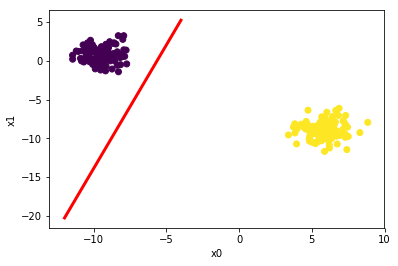

In [4]:
plt.plot(line_x0, line_x1, color='r', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.xlabel('x0')
plt.ylabel('x1')

这里，什么是符号函数sign呢？  
首先了解一下我们的数据，用集合$T={(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)}$表示。其中$(x_i, y_i)$，表示数据中的第i个样本，$x_i$是样本的特征向量，$x_i$的维度是由数据本身决定，或者我们打算采用的特征数决定的，$y_i$是样本对于的分类标签。  

那么以二维空间为例，即：$x_i$是二维的。假设我们现在有一条直线，其表达式是$w_0 x^{(0)} + w_1 x^{(1)} + b = 0$，其中$x^{(0)}$，$x^{(1)}$代表过该直线的任意一点，$x^{(0)}$是横坐标， $x^{(1)}$是纵坐标。    
现在有一点$(2,5)$，怎么判断他是在直线上方还是下方呢？  
我们需要把(2,5)带入上面的公式, $\hat y = w_0 * 2 + w_1 *5 + b$。$\hat y$是这个线性方程算出来的，代表预测值。如果$\hat y > 0$ 也就是点在直线上方，这个点被记作属于C1类。如果$\hat y < 0$ 也就是点在直线上方，这个点被记作属于C2类。   

根据上面的解释，由于$\hat y$大于0的值最多可能和$x_i$的个数一样多，小于0的值也是同样的情况，所以，能不能经过一个函数$sign = f(\hat y)$，使得$\hat y$为变为一个的值，又能反应类别呢。伟大的数学家们就定义了这么一个函数，确实能做到。
  
$$
sign(\hat y) = 
\begin{cases}
\hat y = 1, \hat y \geq 0\\\\
\hat y = -1, \hat y < 0
\end{cases}
$$

---
$\hat y$ 经过上面sign函数后，我们就能把$(2,5)$点分为 +1类 或者 -1类 了。

那么，我们怎么确定这条直线呢？  
我们现在已经知道了$X$，所以就要用这些X来确定这条直线了。这里$X$是大写，表示一个矩阵，矩阵的每一行代码我们的一个样本，每一列代表样本的每个特征。

In [5]:
X[:5]

array([[  7.28678297,  -8.51538322],
       [-10.62425645,   0.33021018],
       [  5.41530338,  -8.30187345],
       [  7.32179896,  -7.04656047],
       [ -7.72847208,  -0.39799556]])

那么怎么开始求解呢，先随机生成我们的$\vec w=[w_0, w_1]$ 和 $b$，这就能在二维空间中确定一条直线了。然后接着看看这条直线能否把这两堆数据分开，如果不能全部分开，那么计算下还差多少（损失函数）才能分开，根据偏差的成调整$\vec w$和$b$的值。   

一直重复这个过程，知道找到合适的$\vec w$和$b$，能把这两堆数据划分开。
计算过程使用梯度下降法，损失函数使用：

$$
L(w, b) = -\sum_{x_i \in M} y_i(\vec w \cdot \vec x_i + b)
$$

### 下面来解释下损失函数的意义：
对于二维空间来说，$\vec w$是二维空间的法向量，$x_i$是二维空间中的一个点，也可以看成二维空间中的一个向量$\vec x$。那么，二维空间中的任一个点到直线$w_0 x^{(0)_i} + w_1 x^{(1)_i} + b = 0$的距离就是：
$$\frac{|w_0 x^{(0)}_i + w_1 x^{(1)}_i + b|}{\sqrt{w_0^2 + w_2^2}}
=
\frac{1}{||\vec w||} |\vec w \cdot \vec x_i + b|
$$

拓展到n维空间，右边的式子也是成立的，表示空间中的任一点到超平面 S$(\vec w \cdot \vec x_i + b)$的距离。

下面引用《统计学习》中的话

---
对于未分类的数据（$\vec x_i, y_i$）来说，$-y_i(\vec w \cdot \vec x_i + b) > 0$成立。因为当$\vec w \cdot \vec x_i + b > 0$时，$y_i = -1$;而当$\vec w \cdot \vec x_i + b < 0$时，$y_i = +1$。所以，误分类点到$x_i$到超平面的S的距离为：
$$
-\frac{1}{||\vec w||} y_i |\vec w \cdot \vec x_i + b|
$$

这样，假设超平面S的误分类点集合为M，那么所有误分类点到超平面S的总距离就是：
$$
-\frac{1}{||\vec w||}\sum_{x_i \in M} y_i (\vec w \cdot \vec x_i + b)
$$
不考虑$\frac{1}{||\vec w||}$，就得到了感知机学习的损失函数,M是误分类点的集合:
$$
L(w, b) = -\sum_{x_i \in M} y_i(\vec w \cdot \vec x_i + b)
$$
因此，如果没有误分类点，损失函数值是0。而且，误分类点越少，误分类点离超平面就越近，损失函数就越小。
所以，我们感知机算法的求解问题就相当度找到使得$L(\vec w, b)$最小（这里由于L是大于等于0的，所以L的最小值是0）的$\vec w、b$。

### 关于为什么要使用梯度下降法的一点想法：
怎么求$L(\vec w, b)$在最小值呢？我们知道数学上，可以使用导数，即$L^{'}(\vec w, b)=0$的解。 

对L求导数可能出现的情况：对系数矩阵X（因为x已知,我们求解的w和b）
$X = 
\begin{bmatrix}
-- x_0 -- \\
-- x_1 -- \\
...\\
-- x_m -- \\
\end{bmatrix}
$

$X$是$m*n矩阵$，是方程的系数矩阵。同时代表着每个样本的特征向量$\vec x_i$是n维的，样本总数是m个。  

a. 如果系数矩阵的秩$r(X)$小于增广矩阵的秩$r(X,-b)$，$r(XS)<r(X,-b)$，那么方程组无解$r(X)<r(X,-b)$，那么方程组$L^{'}(w, b)=0$无解；   
b. 如果系统矩阵的秩小于方程组未知数个数，$r(X)=r(X,-b)<n$，那么方程组有多个解$r(X)=r(X,-b)<n$，那么方程组$L^{'}(w, b)=0$有多个解。      
c. 如果系统矩阵的秩等于方程组未知数个数，$r(X)=r(X,-b)=n$，那么方程组有唯一解$r(X)=r(X,-b)=n$，那么方程组$L^{'}(w, b)=0$有唯一解。   

1. 样本数量m**大于**特征维度n，则以上三种情况都有可能发生
2. 样本数量m**小于**特征维度n，则会发生a和b两种情况。

而只有c情况才能用逆求解。  
所以不能直接使用$w = -{X}^{-1}{b}$求解。   
于是有了梯度下降法求解。

梯度下降法求得是损失函数极小化问题的解，也就是说，求出的解有可能出现局部最优解，二不是全局最优解。

一下引用书中的步骤：   
假设误分类点M的集合是固定的，那么损失函数$L^{'}(\vec w, b)$的梯度由
$$
\\
\nabla_w L(\vec w, b) = - \sum_{x_i \in M} y_i \vec x_i\\\\\\
\nabla_b L(\vec w, b) = - \sum_{x_i \in M} y_i
$$  
给出。  

随机选取一个误差分类点$(x_i, y_i)$，对$w, b$进行更新：
$$
\\
\vec w <- \vec w + \eta y_i \vec x_i \\
b <- b + \eta y_i
$$   
式中$\eta$是步长，又称为学习率(learning rate)，控制w和b更新的幅度。   
这样，通过迭代可以期待损失函数$L^{'}(\vec w, b)$不断减小，直到为0。
![%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95.png](attachment:%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95.png)

### 代码实现

In [6]:
X = np.array([
    [3.393533211, 2.331273381],
    [3.110073483, 1.781539638],
    [1.343808831, 3.368360954],
    [3.582294042, 4.679179110],
    [2.280362439, 2.866990263],
    [7.423436942, 4.696522875],
    [5.745051997, 3.533989803],
    [9.172168622, 2.511101045],
    [7.792783481, 3.424088941],
    [7.939820817, 0.791637231]
])
y = np.array([-1, -1, -1, -1, -1,  1,  1,  1,  1,  1])

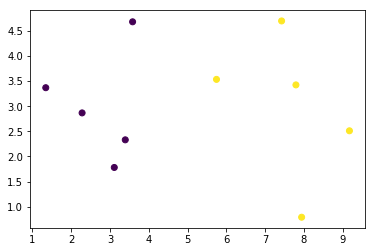

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [8]:
def sign(x, w, b):
    if x.dot(w) + b >= 0 :
        return 1
    else:
        return -1

In [9]:
# 2.定义损失函数
def loss_func(w, b):
    loss = 0
    for xi, yi in zip(X, y):
        y_hat = sign(xi, w, b)
        if yi != y_hat:
            loss += yi * (xi.dot(w) + b)
    return -loss


In [10]:
def train(X, y, eta=1e-1, epoch=100):
    w_list = []
    b_list = []
    loss_list = []
    # 1.随机生成w和b的初始值
    w = np.zeros_like(X[0], dtype=np.float32)
    b = 0

    for e in range(epoch):
        for xi, yi in zip(X, y):
            w_list.append(list(w))
            b_list.append(b)
            if yi * (xi.dot(w) + b) <= 0:
                w += eta * yi * xi
                b += eta * yi
        
        loss = loss_func(w, b)
        print('epoch {}: loos={}'.format(e+1, loss))

        loss_list.append(loss)
        if loss == 0:
            break

    return w_list, b_list, loss_list


In [11]:
w_list, b_list, loss_list = train(X, y, eta=1e-1)

epoch 1: loos=9.079368480296846
epoch 2: loos=10.717623034456693
epoch 3: loos=12.355877997208527
epoch 4: loos=13.994132551368377
epoch 5: loos=15.632387105528228
epoch 6: loos=4.827727915409205
epoch 7: loos=13.90709691626047
epoch 8: loos=0


In [12]:
line_x0 = [1, 9]
line_x1_list = [((-bi-wi0*(9))/ wi1, (1*wi0-bi) / wi1) for (wi0, wi1), bi in zip(w_list, b_list)]

C:\Users\ANG\AppData\Local\conda\conda\envs\ml\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


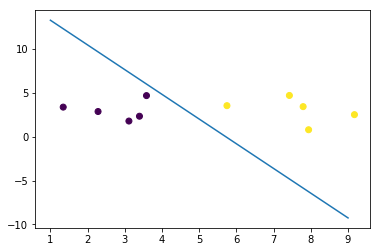

In [18]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.plot(line_x0, line_x1_list[-1])

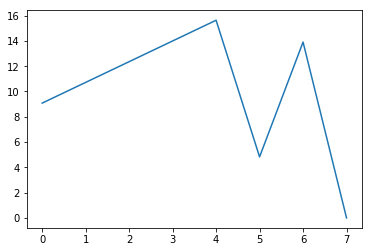

In [14]:
%matplotlib inline
plt.plot(loss_list)
plt.show()

### 对偶形式

$$f(x) = \sum_{j=1}^{N} \alpha_j y_j \vec x_j \cdot \vec x_i + b)$$
 
$$G = XX^T$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X = np.array([
    [3, 3],
    [4, 3],
    [1, 1]
], dtype=np.float32)
y = np.array([1, 1, -1])

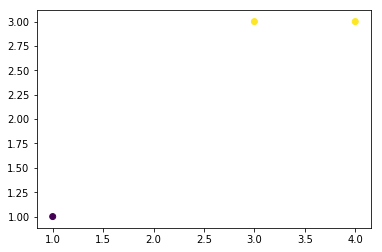

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [18]:
# 计算Gram矩阵
G = np.dot(X, X.T)
G

array([[18., 21.,  6.],
       [21., 25.,  7.],
       [ 6.,  7.,  2.]], dtype=float32)

In [14]:
G[:,0].dot(y)

33.0

In [21]:
X.shape

(3, 2)

In [27]:
# 初始化参数
a = np.zeros_like(G[:, i])
b = 0
eta = 1

In [28]:
a

array([0., 0., 0.], dtype=float32)

In [29]:
for e in range(1):
    err_num = 0
    for i, yi in enumerate(y):
        if yi * (G[:,i].dot(y) + b) <= 0:
            a[i] += eta
            b += eta * yi
            err_num += 1
    if err_num == 0:
        break

In [32]:
# 得到超平面的参数 w, b
# x的输入顺序不一样，解也不一样
w = a.dot(X)
b = b

w, b

(array([1., 1.], dtype=float32), -1)

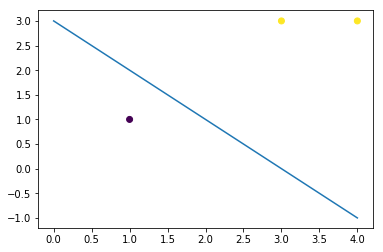

In [34]:
# 画图
line_x = np.arange(0, 5)
lint_y = -line_x + 3
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(line_x, lint_y)